In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding = 'unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
for col in df.select_dtypes(include=[np.object]):
    print('{} has {} unique number of categories'.format(col,df[col].nunique()))

Type has 4 unique number of categories
Delivery Status has 4 unique number of categories
Category Name has 50 unique number of categories
Customer City has 563 unique number of categories
Customer Country has 2 unique number of categories
Customer Email has 1 unique number of categories
Customer Fname has 782 unique number of categories
Customer Lname has 1109 unique number of categories
Customer Password has 1 unique number of categories
Customer Segment has 3 unique number of categories
Customer State has 46 unique number of categories
Customer Street has 7458 unique number of categories
Department Name has 11 unique number of categories
Market has 5 unique number of categories
Order City has 3597 unique number of categories
Order Country has 164 unique number of categories
order date (DateOrders) has 65752 unique number of categories
Order Region has 23 unique number of categories
Order State has 1089 unique number of categories
Order Status has 9 unique number of categories
Product

In [4]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [5]:
for i in range(0,len(df['Order Status'])):
    if((df['Order Status'][i] == 'PENDING') | (df['Order Status'][i] == 'PENDING_PAYMENT') | (df['Order Status'][i] == 'SUSPECTED_FRAUD') |
      (df['Order Status'][i] == 'ON_HOLD') | (df['Order Status'][i] == 'PAYMENT_REVIEW')):
        df['Order Status'][i] = 'SUS_FRAUD'
    else:
        df['Order Status'][i] = 'NOT_FRAUD'

<ipython-input-5-b5439bf62388>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Status'][i] = 'NOT_FRAUD'
<ipython-input-5-b5439bf62388>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Status'][i] = 'SUS_FRAUD'


C:\Users\fayiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


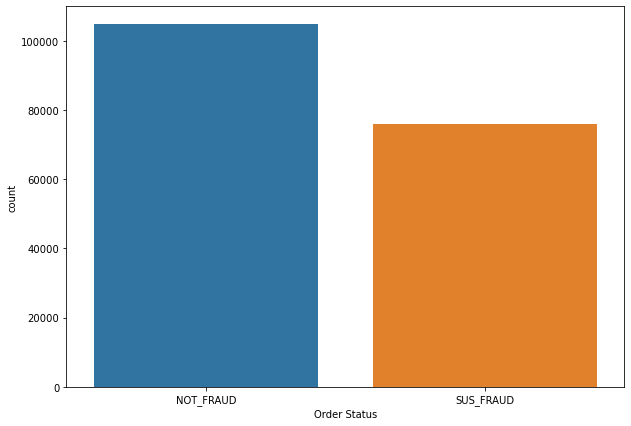

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(df['Order Status'])
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
for col in df.select_dtypes(include=[np.object]):
    if(df[col].nunique() > 10):
        df[col] = le.fit_transform(df[col])

In [10]:
df = pd.get_dummies(df,drop_first=True)

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df = df[~((df < (ll)) |(df > (ul))).any(axis=1)]

In [13]:
for col in df.columns:
    print(col)

Days for shipping (real)
Days for shipment (scheduled)
Benefit per order
Sales per customer
Late_delivery_risk
Category Id
Category Name
Customer City
Customer Fname
Customer Id
Customer Lname
Customer State
Customer Street
Customer Zipcode
Department Id
Department Name
Latitude
Longitude
Order City
Order Country
Order Customer Id
order date (DateOrders)
Order Id
Order Item Cardprod Id
Order Item Discount
Order Item Discount Rate
Order Item Id
Order Item Product Price
Order Item Profit Ratio
Order Item Quantity
Sales
Order Item Total
Order Profit Per Order
Order Region
Order State
Order Zipcode
Product Card Id
Product Category Id
Product Description
Product Image
Product Name
Product Price
Product Status
shipping date (DateOrders)
Type_DEBIT
Type_PAYMENT
Type_TRANSFER
Delivery Status_Late delivery
Delivery Status_Shipping canceled
Delivery Status_Shipping on time
Customer Country_Puerto Rico
Customer Segment_Corporate
Customer Segment_Home Office
Market_Europe
Market_LATAM
Market_Pacif

In [15]:
df.drop(['Category Name','Customer Fname','Customer Lname','Department Name',
        'Latitude','Longitude','Product Image','Product Name'],axis=1,inplace=True)

In [16]:
df.rename(columns={'Order Status_SUS_FRAUD':'ORDER_STATUS'},inplace=True)

C:\Users\fayiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


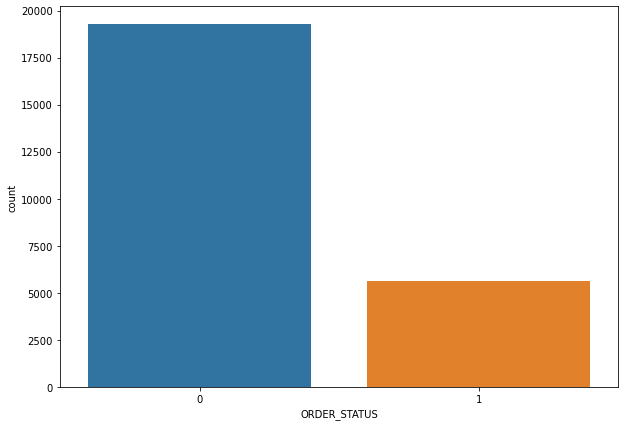

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(df['ORDER_STATUS'])
plt.show()

In [18]:
df = df.reset_index()

In [19]:
df.shape

(24873, 54)

In [20]:
X = df.drop('ORDER_STATUS',axis=1)
y = df['ORDER_STATUS']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18654, 53)
(18654,)
(6219, 53)
(6219,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.10796034 -0.91973187 -1.76600963 ...  0.          0.
  -1.76600963]
 [-1.08582626 -0.91973187 -1.76600963 ...  0.          0.
  -1.76600963]
 [ 1.05771069 -0.3035604   0.56624833 ...  0.          0.
   0.56624833]
 ...
 [-0.42669185  1.54495399  0.56624833 ...  0.          0.
   0.56624833]
 [-0.28237685 -0.3035604   0.56624833 ...  0.          0.
   0.56624833]
 [-1.3007811  -0.3035604   0.56624833 ...  0.          0.
   0.56624833]]
[[ 0.03416219 -0.91973187  0.56624833 ...  0.          0.
   0.56624833]
 [-1.49647949 -0.91973187 -1.76600963 ...  0.          0.
  -1.76600963]
 [-0.28949208 -0.91973187  0.56624833 ...  0.          0.
   0.56624833]
 ...
 [ 0.03652736 -0.3035604   0.56624833 ...  0.          0.
   0.56624833]
 [ 0.27779476 -0.91973187  0.56624833 ...  0.          0.
   0.56624833]
 [ 0.55938836 -0.91973187 -1.76600963 ...  0.          0.
  -1.76600963]]


C:\Users\fayiq\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\fayiq\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [23]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

In [26]:
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

# Using Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(random_state = 0)
lrclassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = lrclassifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4509  267]
 [1169  274]]


0.7690947097604116

# K_Nearest neighbours 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knnclassifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4408  368]
 [1020  423]]


0.7768129924425149

# Decision Tree Classifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtcclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtcclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred = dtcclassifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4356  420]
 [ 432 1011]]


0.8630004823926676

# Random Forest Classifier 

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfcclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfcclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
y_pred = rfcclassifier.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4589  187]
 [ 887  556]]


0.8273034249879402

# Naive-Bayes Classifier 

In [38]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = nbclassifier.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3788  988]
 [ 494  949]]


0.7616980221900627

# Model Evaluation

In [41]:
def model_eval(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_train_pred = algo.predict(xtrain)
    y_train_prob = algo.predict_proba(xtrain)[:,1]

    print('confusion matrix - train : \n',confusion_matrix(ytrain,y_train_pred))
    print('Accuracy of the train data: ',accuracy_score(ytrain,y_train_pred))
    print('Area under the curve AUC on the train : ',roc_auc_score(ytrain,y_train_prob))
    print('\n')
    algo.fit(xtest,ytest)
    y_test_pred = algo.predict(xtest)
    y_test_prob = algo.predict_proba(xtest)[:,1]

    print('confusion matrix - test : \n',confusion_matrix(ytest,y_test_pred))
    print('Accuracy of the test data: ',accuracy_score(ytest,y_test_pred))
    print('Area under the curve AUC on the test : ',roc_auc_score(ytest,y_test_prob))
    print('\n')

    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    plt.figure(figsize=(10,7))
    plt.plot(fpr,tpr,label='Train')
    plt.plot(fpr,fpr,'r',label='test')
    plt.legend()
    plt.show()

confusion matrix - train : 
 [[13744   738]
 [ 3329   843]]
Accuracy of the train data:  0.7819770558593331
Area under the curve AUC on the train :  0.7778007856613884


confusion matrix - test : 
 [[4446  330]
 [1019  424]]
Accuracy of the test data:  0.7830840971217238
Area under the curve AUC on the test :  0.7780380883395959




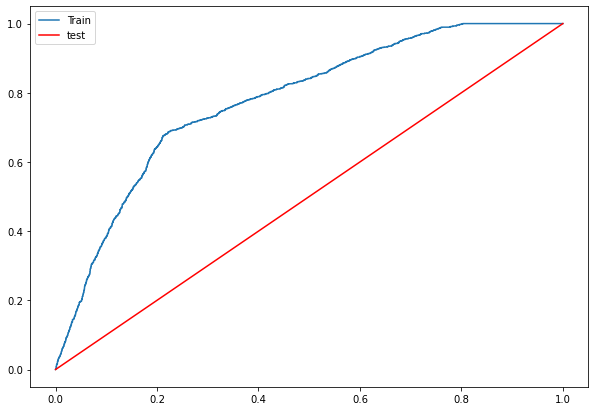

In [46]:
model_eval(lrclassifier,X_train, X_test, y_train, y_test)

confusion matrix - train : 
 [[13810   672]
 [ 2108  2064]]
Accuracy of the train data:  0.8509703012758658
Area under the curve AUC on the train :  0.891823393552455


confusion matrix - test : 
 [[4537  239]
 [ 792  651]]
Accuracy of the test data:  0.8342177198906576
Area under the curve AUC on the test :  0.8716246687352215




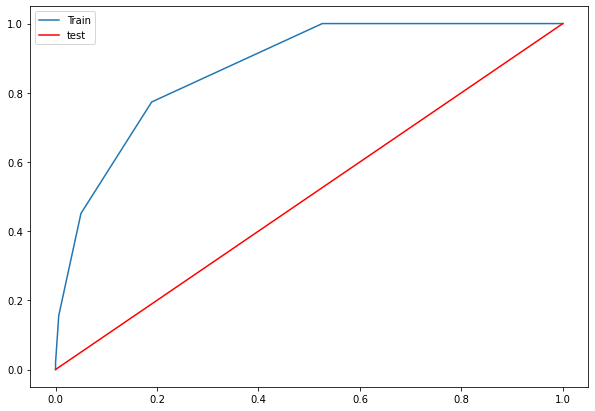

In [47]:
model_eval(knnclassifier,X_train, X_test, y_train, y_test)

confusion matrix - train : 
 [[14482     0]
 [    0  4172]]
Accuracy of the train data:  1.0
Area under the curve AUC on the train :  1.0


confusion matrix - test : 
 [[4776    0]
 [   0 1443]]
Accuracy of the test data:  1.0
Area under the curve AUC on the test :  1.0




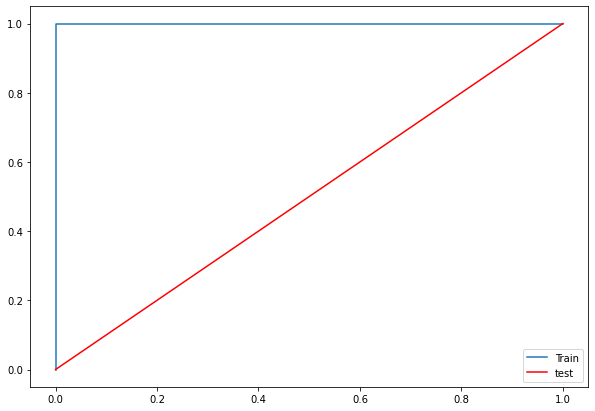

In [48]:
model_eval(dtcclassifier,X_train, X_test, y_train, y_test)

confusion matrix - train : 
 [[14474     8]
 [  203  3969]]
Accuracy of the train data:  0.9886887530824489
Area under the curve AUC on the train :  0.9996543548688006


confusion matrix - test : 
 [[4773    3]
 [  86 1357]]
Accuracy of the test data:  0.9856890175269336
Area under the curve AUC on the test :  0.9995766688605884




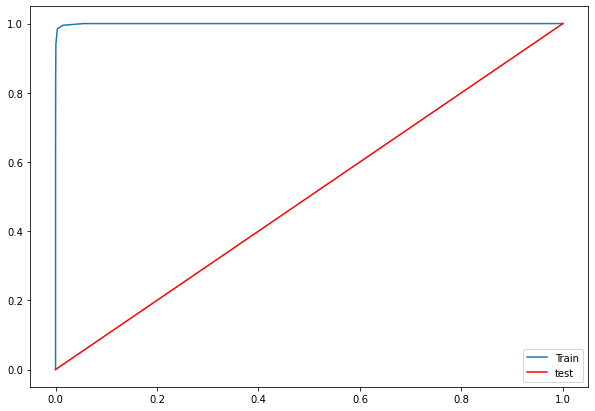

In [49]:
model_eval(rfcclassifier,X_train, X_test, y_train, y_test)

confusion matrix - train : 
 [[11504  2978]
 [ 1414  2758]]
Accuracy of the train data:  0.7645545191379864
Area under the curve AUC on the train :  0.7158107005714636


confusion matrix - test : 
 [[3824  952]
 [ 518  925]]
Accuracy of the test data:  0.7636275928605886
Area under the curve AUC on the test :  0.7192134151933146




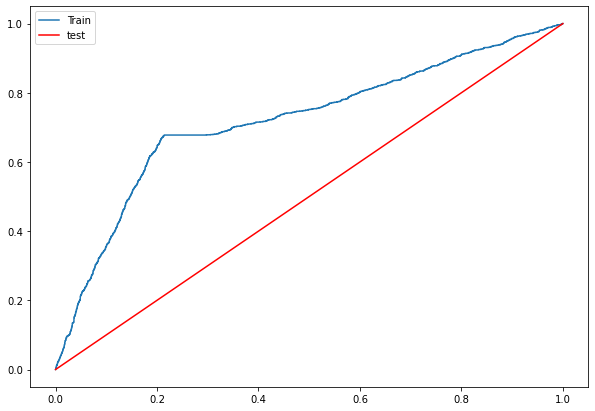

In [50]:
model_eval(nbclassifier,X_train, X_test, y_train, y_test)